In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [7]:
def preprocess(array):
    array = array.astype("float32")/255.0
    array = np.reshape(array, (len(array),28,28,1))
    return array

In [17]:
def display(array1, array2):
    
    n=10
    
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]
    
    plt.figure(figsize=(20, 4))
    for i, (images1, images2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(images1.reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax =plt.subplot(2, n, i+1+n)
        plt.imshow(images2.reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [10]:
def noise(array):
    noise_factor =0.4
    nosy_array = array + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=array.shape)
    
    return np.clip(nosy_array, 0.0, 1.0)

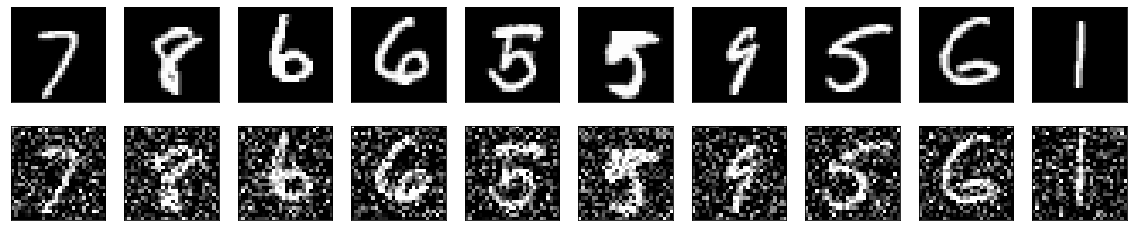

In [18]:
(train_data, _),(test_data,_) = mnist.load_data()

#Normalize and Reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

#create noisy data
nosy_train_data = noise(train_data)
nosy_test_data = noise(test_data)

display(train_data, nosy_train_data)


In [20]:
#Build Autoencoders
#We are going to use the functional API to build our Convolutional AutoEncoders

In [21]:
input = layers.Input(shape=(28,28,1))

#Encoder
x = layers.Conv2D(32,(3,3),activation='relu', padding="same")(input)
x = layers.MaxPool2D((2,2), padding="same")(x)
x = layers.Conv2D(32,(3,3), activation="relu", padding="same")(x)
x = layers.MaxPool2D((2,2), padding="same")(x)

#Decoder
x= layers.Conv2DTranspose(32,(3,3), activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32,(3,3), activation="relu", strides=2, padding="same")(x)
x = layers.Conv2D(1, (3,3), activation="sigmoid", padding="Same")(x)

#Autoencoders
autoencoder = Model(input,x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

In [23]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 82s 174ms/step - loss: 0.0623 - val_loss: 0.0619
Epoch 2/50
469/469 [==============================] - 85s 182ms/step - loss: 0.0622 - val_loss: 0.0619
Epoch 3/50
469/469 [==============================] - 85s 182ms/step - loss: 0.0622 - val_loss: 0.0619
Epoch 4/50
469/469 [==============================] - 85s 181ms/step - loss: 0.0622 - val_loss: 0.0619
Epoch 5/50
469/469 [==============================] - 78s 167ms/step - loss: 0.0622 - val_loss: 0.0619
Epoch 6/50
469/469 [==============================] - 82s 176ms/step - loss: 0.0622 - val_loss: 0.0619
Epoch 7/50
469/469 [==============================] - 83s 178ms/step - loss: 0.0622 - val_loss: 0.0618
Epoch 8/50
469/469 [==============================] - 83s 177ms/step - loss: 0.0622 - val_loss: 0.0618
Epoch 9/50
469/469 [==============================] - 89s 189ms/step - loss: 0.0621 - val_loss: 0.0618
Epoch 10/50
469/469 [==============================] - 87s 185ms/step - l

313/313 [==============================] - 8s 23ms/step


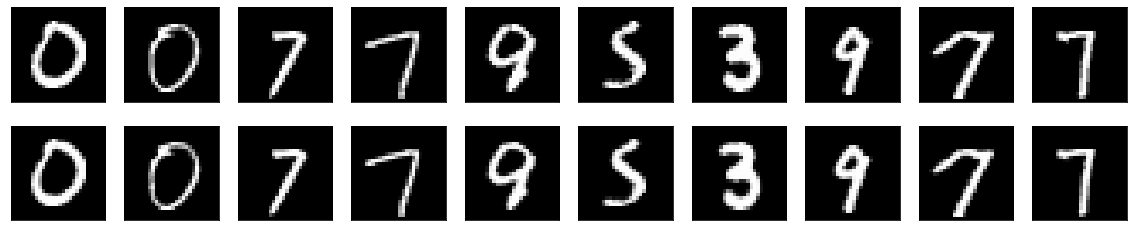

In [24]:
predict = autoencoder.predict(test_data)
display(test_data, predict)

In [26]:
#Reconstruct the original images from nosy images
autoencoder.fit(
        x= nosy_train_data,
        y = train_data,
        epochs=50,
        batch_size=128,
        shuffle=True,
        validation_data =(nosy_test_data, test_data)
)

Epoch 1/50
469/469 [==============================] - 91s 193ms/step - loss: 0.1006 - val_loss: 0.0936
Epoch 2/50
469/469 [==============================] - 90s 192ms/step - loss: 0.0928 - val_loss: 0.0914
Epoch 3/50
469/469 [==============================] - 88s 189ms/step - loss: 0.0913 - val_loss: 0.0905
Epoch 4/50
469/469 [==============================] - 89s 190ms/step - loss: 0.0903 - val_loss: 0.0895
Epoch 5/50
469/469 [==============================] - 89s 190ms/step - loss: 0.0896 - val_loss: 0.0889
Epoch 6/50
469/469 [==============================] - 89s 189ms/step - loss: 0.0890 - val_loss: 0.0883
Epoch 7/50
469/469 [==============================] - 87s 186ms/step - loss: 0.0885 - val_loss: 0.0880
Epoch 8/50
469/469 [==============================] - 89s 189ms/step - loss: 0.0881 - val_loss: 0.0876
Epoch 9/50
469/469 [==============================] - 87s 186ms/step - loss: 0.0878 - val_loss: 0.0873
Epoch 10/50
469/469 [==============================] - 88s 188ms/step - l

313/313 [==============================] - 7s 23ms/step


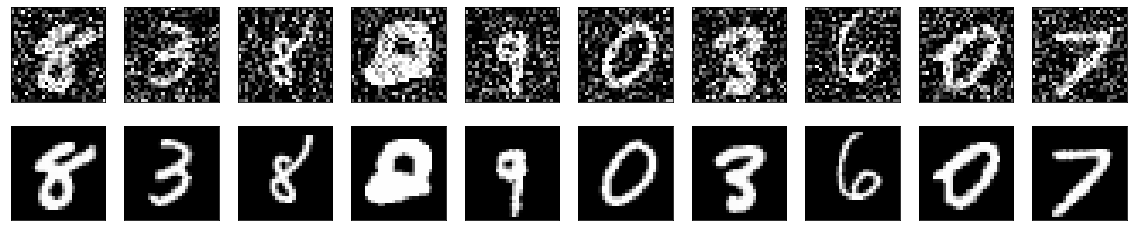

In [27]:
predict_test = autoencoder.predict(nosy_test_data)
display(nosy_test_data, test_data)